<a href="https://colab.research.google.com/github/chansachiwele/Git-Materials/blob/master/Image_Classiffier_Git_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working on the Fashion Fashion UMNIST dataset by Chansa Chiwele. It is a very intuitive dataset for practicing Neural Networks on. It has 70,000 grayscale images of 28 × 28 pixels each, with 10 classes. 



## Importing the necessary libraries for use in this work.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

print (f' The TensorFlow version is {tf.__version__}')



 The TensorFlow version is 2.3.0


In [ ]:
# Checking the keras version
print(f'The keras version is {keras.__version__}')

The keras version is 2.4.0


##Loading the UMNIST dataset using keras utilities.

In [ ]:
df = keras.datasets.fashion_mnist 
(X_train_whole , y_train_whole), (X_test , y_test) = fashion_mnist.load_data() 


##Let us normalize the training and the test datasets.

In [ ]:
X_train_whole, X_test = X_train_whole/ 255., X_test/ 255.

##The dataset is already split into 60,000 images for the training set and 10,000 images forthe test set. I need to split the whole training dataset into 55,000 training images and 5,000 validation images.

In [ ]:
X_validation, X_train_whole = X_train_whole[:5000], X_train_whole[5000:]

In [ ]:
y_validation, y_train_whole = y_train_whole[:5000], y_train_whole[5000:]

In [ ]:
classes = ["T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot"] 


##Plotting the image from class 0.

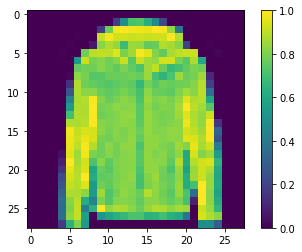

In [ ]:
plt.figure()
plt.imshow(X_train_whole[0])
plt.colorbar()
plt.grid(False)
plt.show()

##Let us verify that the data is in the correct format and that we are ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

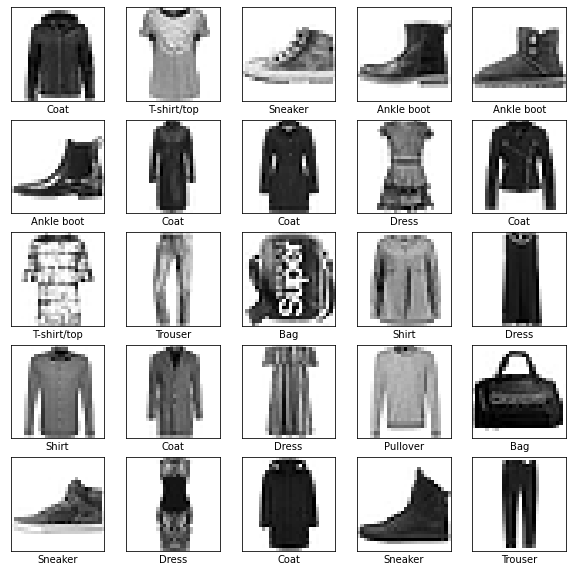

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_whole[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train_whole[i]])
plt.show()

In [ ]:
# Checking the items in the classes.

classes[y_train_whole[2]] 


'Sneaker'

###Building the model for classifying the UMNIST Fashon images.

In [ ]:
model = Sequential()
model.add (Flatten(input_shape = [ 28 , 28])) 
model.add (Dense (300, activation = "relu")) 
model.add (Dense (100, activation = "relu")) 
model.add (Dense (10 , activation = "softmax")) 

                    


In [ ]:
# Checking the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hidden1 = model.layers[1] 


In [ ]:
print(hidden1)

In [ ]:
print(hidden1.name)

dense


In [ ]:
# model.get_layer ('max_pooling2d_3') is hidden1 


In [ ]:
hidden2 = model.layers[2]  


In [ ]:
print(hidden2.name)

dense_1


In [ ]:
weights = hidden2.get_weights() 


In [ ]:
print(weights)

[array([[-0.02458986,  0.08664676,  0.04714923, ...,  0.01676763,
         0.11451247,  0.08519755],
       [ 0.11035077,  0.01140416, -0.04741025, ..., -0.03473091,
        -0.05836079,  0.00556973],
       [-0.09412708, -0.03230745, -0.11296237, ..., -0.084088  ,
         0.09320156,  0.04156341],
       ...,
       [-0.01725276, -0.07910429, -0.01064517, ..., -0.07865983,
         0.11775606, -0.08870003],
       [-0.11643656,  0.00251084, -0.00275916, ...,  0.12183126,
         0.08203948, -0.02887505],
       [-0.0849316 ,  0.0368192 , -0.07528286, ..., -0.04058143,
         0.07799055,  0.10790849]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

##We now compile the model using the  sparce_cross_entropy loss function because we have sparce labels that is, 0 to 9 inclusive..

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd" , metrics = ["accuracy"]) 


In [ ]:
#import numpy as np
#scaled_train_images=X_train_whole[...,np.newaxis]
#scaled_valid_imags=X_validation[...,np.newaxis]
#scaled_test_images=X_test[...,np.newaxis]

In [ ]:


history = model.fit(X_train_whole, y_train_whole,
                    validation_data = (X_validation, y_validation), 
                    epochs = 30, verbose=1)


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7279 - accuracy: 0.7632 - val_loss: 0.5019 - val_accuracy: 0.8380
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4914 - accuracy: 0.8301 - val_loss: 0.4608 - val_accuracy: 0.8416
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4457 - accuracy: 0.8429 - val_loss: 0.4123 - val_accuracy: 0.8630
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4171 - accuracy: 0.8535 - val_loss: 0.3984 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3989 - accuracy: 0.8593 - val_loss: 0.3787 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3819 - accuracy: 0.8655 - val_loss: 0.3794 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3680 - accuracy: 0.8701 - val_loss: 0.3614 - val_accuracy:

##We have obtained the accuracy of 92%  and validation accuracy of 89%.

##Set the vertical range to [0-1] 

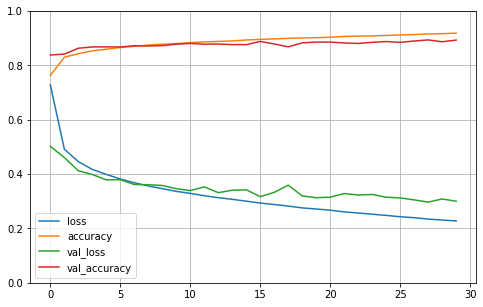

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt . show () 


##I am now going to evaluating the model to check that it works. Sometimes, model evaluation can get a lower accuracy because the model has been trained on the training dataset and not on the test dataset used for model evaluaton.

In [ ]:
model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8836


[0.3270513713359833, 0.8835999965667725]

##I am now going to use the model for prediction. We will use some instances from the test data to predict. We are going to use the first 4 instances from the test data to make the predictions. Remember we do not use the labels in predictions.

In [ ]:
X_prediction = X_test[:4]

##Let us look at the class probabilities that will tell us the classes where these fashion items belong.

In [ ]:
y_probabilities = model.predict(X_prediction)

In [ ]:
print(y_probabilities.round(2))

[[0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.98]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


###For each instance, the model has given us a probability. In the first class, the biggest number is 9.60168839e-01, implying the the instance is in class 9, which is an ankle boot.

##In order to know about the class with the highest estimated probability (even if that probability is quite low), we can use the predict_class() method.


In [ ]:

y_prediction = model.predict_classes (X_prediction) 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(y_prediction)

[9 2 1 1]


##Predicting the classes for the first 4 instances of UMIST fashion.

In [ ]:
import numpy as np

x = np.array(classes)[y_prediction] 
print(x)


['Ankle boot' 'Pullover' 'Trouser' 'Trouser']
